**Relatório preliminar**

* Disciplina:
    * Inteligência Computacional
* Profesor:
    * Alexandre Gonçalves Evsukoff
* Alunos:
    * Celso Teixeira Tinoco
    * Marcos Seefelder de Assis Araujo



# Introdução:

O objetivo principal do então trabalho é o aprimoramento nos conhecimentos referentes a inteligência computacional, a partir da prática do uso de ferramentas estatísticas, algoritmos e bibliotecas de <i>Data Science</i>. Todo o procedimento será realizado utilizando Python 3 e algumas bibliotecas matemáticas auxiliares. Neste relatório preliminar será apresentado um problema de classificação e será feita uma primeira análise sobre o mesmo, com extração de informações relevantes e discussão sobre suas características.

O problema escolhido para ser explorado é um problema de classificação de folhas, chamado Leaf Classification, e pode ser encontrado na seção de *Competitions* do site [Kaggle](https://www.kaggle.com/competitions). O objetivo desse problema é classificar diferentes espécies de folhas, a partir de sua forma, textura e margem.

No decorrer do relatório, utilizaremos o seguinte <i>workflow</i> para análise dos dados, que julgamos razoável:

O objetivo principal do então trabalho é o aprimoramento nos conhecimentos referentes a inteligência computacional, a partir da prática do uso de ferramentas estatísticas, algoritmos e bibliotecas de <i>Data Science</i>. Todo o procedimento será realizado utilizando Python 3 e algumas bibliotecas matemáticas auxiliares. Neste relatório preliminar será apresentado um problema de classificação e será feita uma primeira análise sobre o mesmo, com extração de informações relevantes e discussão sobre suas características.

O problema escolhido para ser explorado é um problema de classificação de folhas, chamado Leaf Classification, e pode ser encontrado na seção de *Competitions* do site [Kaggle](https://www.kaggle.com/competitions). O objetivo desse problema é classificar diferentes espécies de folhas, a partir de sua forma, textura e margem.

No decorrer do relatório, utilizaremos o seguinte <i>workflow</i> para análise dos dados, que julgamos razoável:

1.	Verificação de variáveis faltantes
2.	Boxplot de cada vetor de atributos
3.	Matrizes de Distâncias, Correlação e Covariância
4.	Padronização dos Dados
5.	Detecção de outliers
6.	Redução da dimensionalidade

Todos os passos anteriores visam preparar o problema para ser posteriormente trabalhado com algoritmos de classificação.

Na seção seguinte (**Caracterização**), iremos caracterizar os conjunto de dados de treinamento através das análises propostas anteriormente. O problema que pretende-s resolver através do presente trabalho será explicado em **Formulação do Problema** e, por último, apresentaremos as tecnologias que escolhemos como ferramentas na seção de **Apresentação da Tecnologia**.

Todos os passos anteriores visam preparar o problema para ser posteriormente trabalhado com algoritmos de classificação.

Na seção seguinte (**Caracterização**), iremos caracterizar os conjunto de dados de treinamento através das análises propostas anteriormente. O problema que pretende-s resolver através do presente trabalho será explicado em **Formulação do Problema** e, por último, apresentaremos as tecnologias que escolhemos como ferramentas na seção de **Apresentação da Tecnologia**.

# Caracterização:

## Dados Fornecidos

O <i>dataset</i> consiste em aproximadamente 1584 imagens de espécies de folhas, que foram convertidas em silhuetas binárias pretas com fundo branco. Cada imagem acompanha três vetores de informações: Um descritor de forma contígua, um histograma da textura interior, e um histograma de margem de fina escala. Cada exemplar de folha possui um identificador único e desconhecido e um de cada vetor citado. Cada vetor possui 64 atributos que o descrevem. A tabela a seguir ilustra bem a disposição dos atributos:

<table>
<tr>
<th>Identificador Unico</th>
<th>Classe do registro (espécie)</th>
<th>Vetor de Margem</th>
<th>Vetor de Forma</th>
<th>Vetor de Textura</th>
</tr>
<tr>
<td><i>id</i></td>
<td><i>species</i></td>
<td><i>margin1, margin2, ..., margin64</i></td>
<td><i>shape1, shape2, ..., shape64</i></td>
<td><i>texture1, textura2, ..., texture64</i></td>
</tr>
</table>

|Identificador Unico|Classe do registro (espécie)|Vetor de Margem|Vetor de Forma|Vetor de Textura|
|--- |--- |--- |--- |--- |
|id|species|margin1, margin2, ..., margin64|shape1, shape2, ..., shape64|texture1, textura2, ..., texture64|

\begin{longtable}[c]{@{}lllll@{}}
\toprule
Identificador Unico & Classe do registro (espécie) & Vetor de Margem &
Vetor de Forma & Vetor de Textura\tabularnewline
\midrule
\endhead
\emph{id} & \emph{species} & \emph{margin1, margin2, \ldots{}, margin64}
& \emph{shape1, shape2, \ldots{}, shape64} & \emph{texture1, textura2,
\ldots{}, texture64}\tabularnewline
\bottomrule
\end{longtable}

## Conjunto de Treinamento

É fornecido com o problema um conjunto de treinamento.

## Análise 

Nessa seção iremos analisar e pré-processar o conjunto de dados de treinamento

Comentários sobre as nossas conclusões em relação ao mesmo serão adicionados ao longo da seção, seguidos dos testes feitos.

In [1]:
### Formato dos dados de teste:

In [2]:
# Importar bibliotecas úteis
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
train = pd.read_csv('train.csv')

In [4]:
train.shape

(990, 194)

In [5]:
columnNames = train.columns.values
count = 0
for i in columnNames:
    print(i, end=", ")
    count = count + 1
    if count>7:
        print("", end="\n")
        count = 0

id, species, margin1, margin2, margin3, margin4, margin5, margin6, 
margin7, margin8, margin9, margin10, margin11, margin12, margin13, margin14, 
margin15, margin16, margin17, margin18, margin19, margin20, margin21, margin22, 
margin23, margin24, margin25, margin26, margin27, margin28, margin29, margin30, 
margin31, margin32, margin33, margin34, margin35, margin36, margin37, margin38, 
margin39, margin40, margin41, margin42, margin43, margin44, margin45, margin46, 
margin47, margin48, margin49, margin50, margin51, margin52, margin53, margin54, 
margin55, margin56, margin57, margin58, margin59, margin60, margin61, margin62, 
margin63, margin64, shape1, shape2, shape3, shape4, shape5, shape6, 
shape7, shape8, shape9, shape10, shape11, shape12, shape13, shape14, 
shape15, shape16, shape17, shape18, shape19, shape20, shape21, shape22, 
shape23, shape24, shape25, shape26, shape27, shape28, shape29, shape30, 
shape31, shape32, shape33, shape34, shape35, shape36, shape37, shape38, 
shape39, s

### Verificação de Valores Ausentes:

In [6]:
# conferindo valores ausentes:
missing = 0
nullcheck = train.isnull()
for i in nullcheck:
    for j in i:
        if (j == True):
            missing = missing+1
            
print(missing, " valores ausentes")

0  valores ausentes


### Distribuição das classes:

In [7]:
classCounts = train["species"].value_counts()
print(len(classCounts), " classes distintas")
print("Máximo de ocorrências de uma classe: ", max(classCounts))
print("Mínimo de ocorrências de uma classe: ", min(classCounts));

99  classes distintas
Máximo de ocorrências de uma classe:  10
Mínimo de ocorrências de uma classe:  10


### Removendo colunas não-atributo:

In [8]:
trainClasses = train["species"]
train = train.drop(['species', 'id'], axis=1)

### Boxplots dos Vetores Característicos:

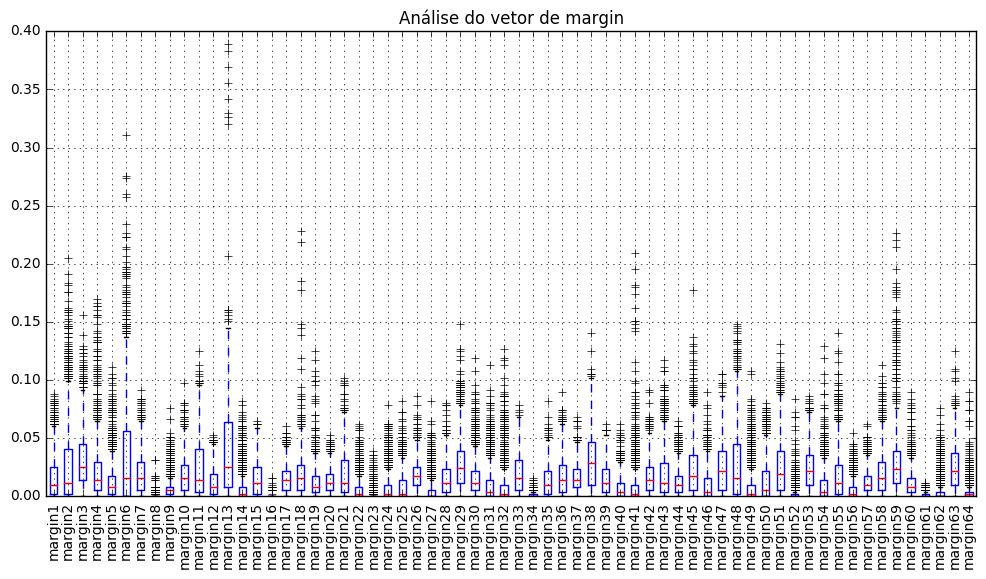

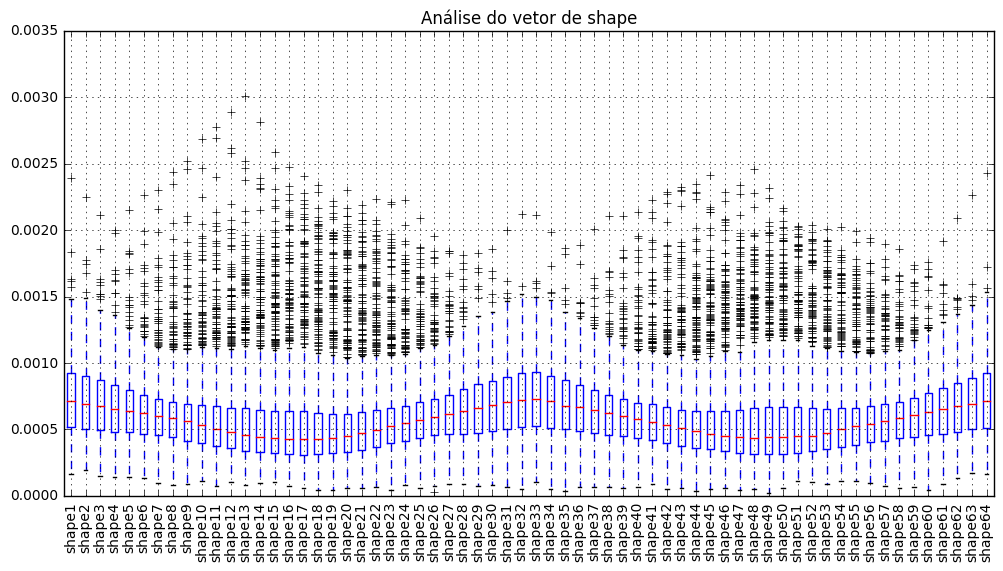

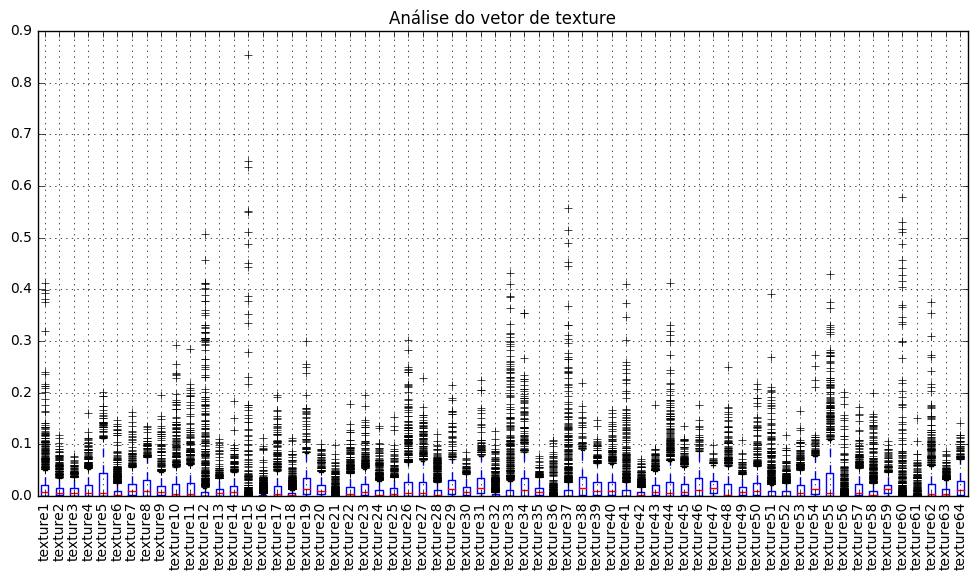

In [9]:
figure(figsize(12,6))
title("Análise do vetor de margin")
train.ix[:,'margin1':'margin64'].boxplot(rot=90)

figure(figsize(12,6))
title("Análise do vetor de shape")
train.ix[:,'shape1':'shape64'].boxplot(rot=90)

figure(figsize(12,6))
title("Análise do vetor de texture")
train.ix[:,'texture1':'texture64'].boxplot(rot=90)

### Histogramas dos vetores característicos:

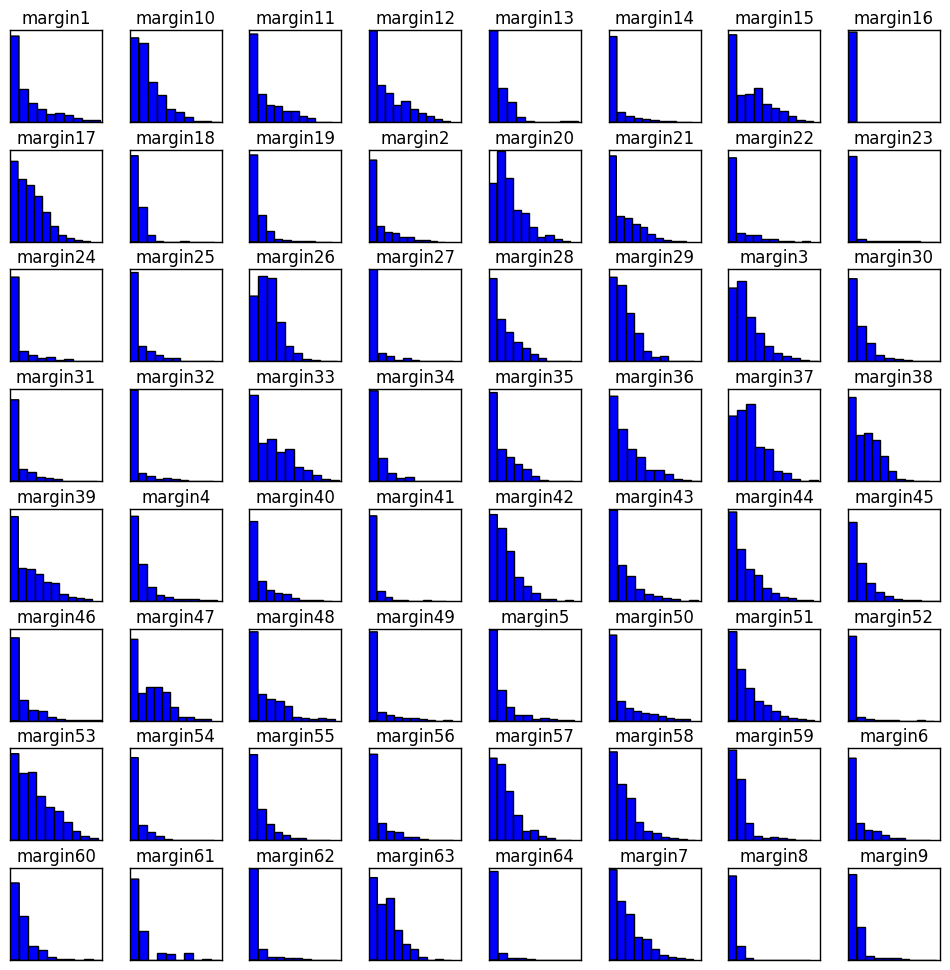

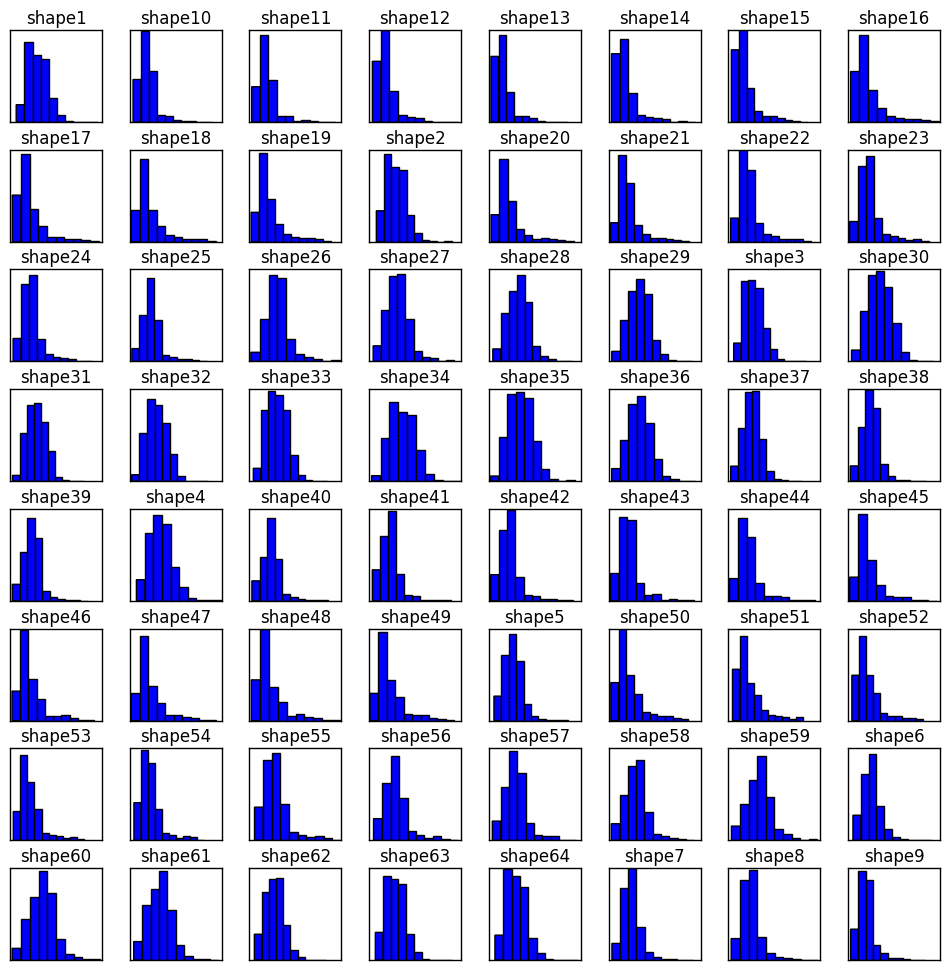

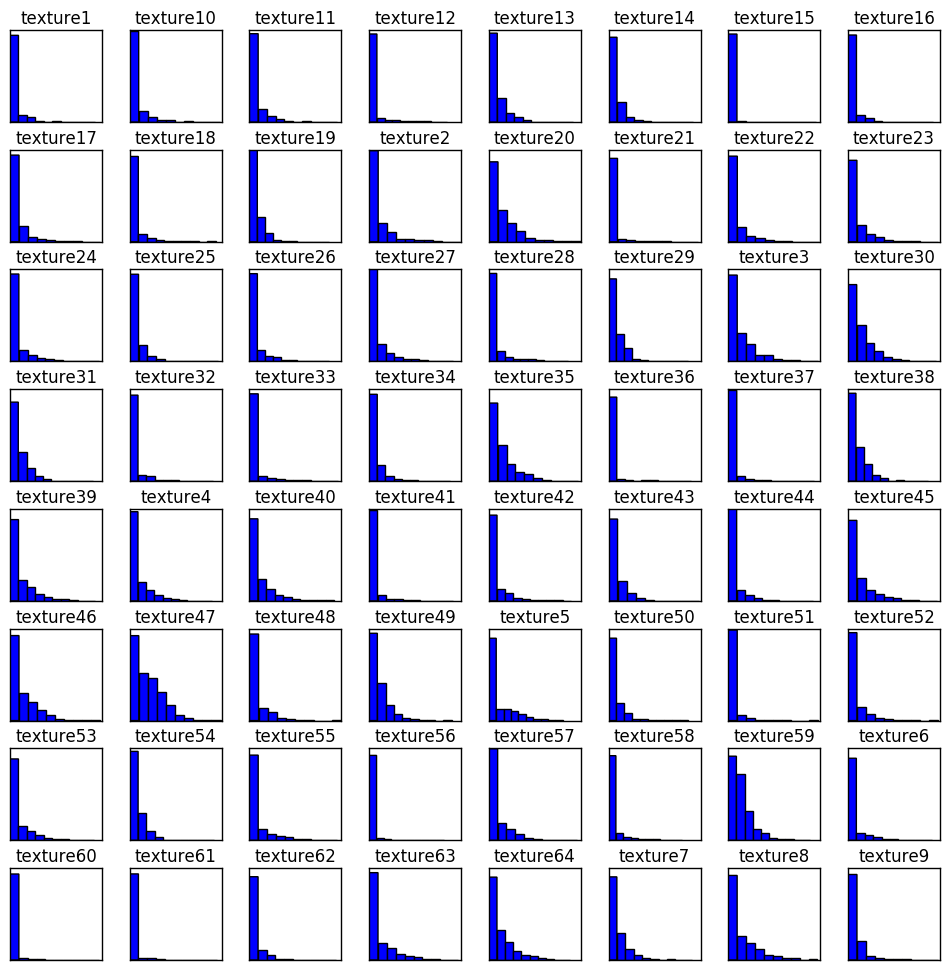

In [10]:
figure(figsize(12,12))
mat = train.ix[:,'margin1':'margin64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)

figure(figsize(12,12))
mat = train.ix[:,'shape1':'shape64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        
figure(figsize(12,12))
mat = train.ix[:,'texture1':'texture64'].hist()
for l in mat:
    for plt in l:
        plt.xaxis.set_visible(False)
        plt.yaxis.set_visible(False)
        


### Matrizes de distâncias

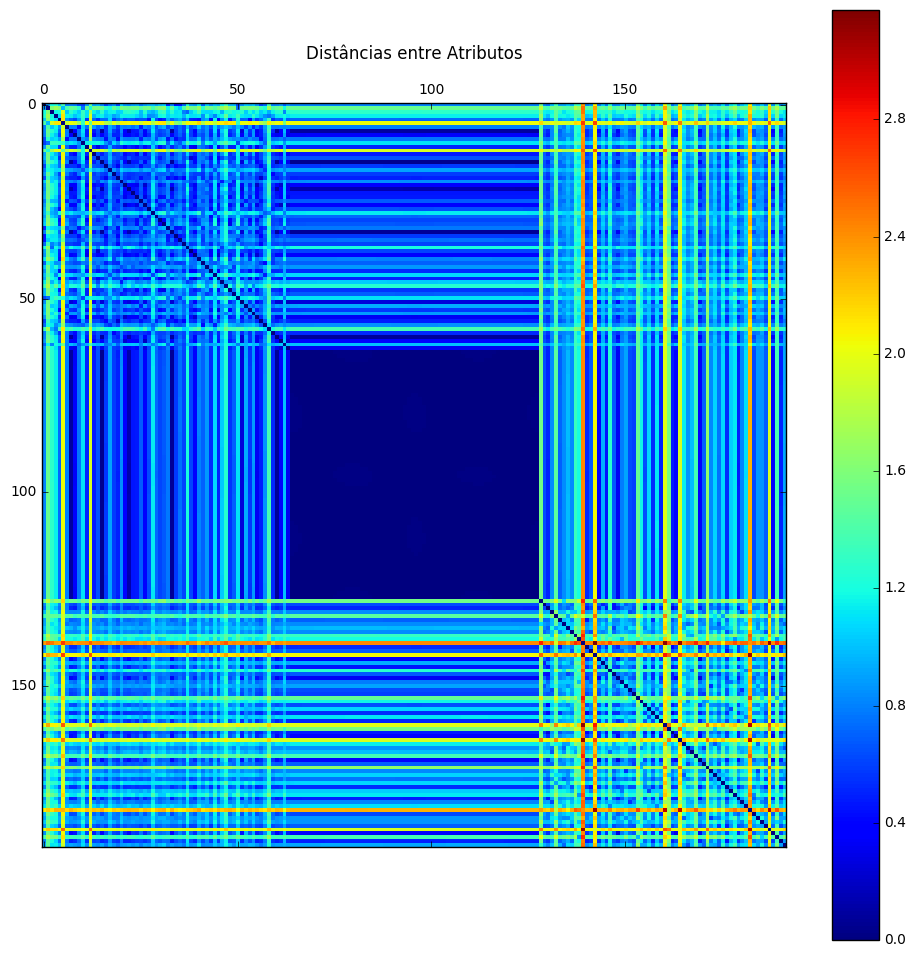

In [11]:
from scipy.spatial.distance import pdist, squareform

figure(figsize=(12,6))

distance = lambda column1, column2: pd.np.linalg.norm(column1 - column2)
distMat = train.apply(lambda col1: train.apply(lambda col2: distance(col1, col2)))
mat = matshow(distMat, cmap='jet')
title("Distâncias entre Atributos")
colorbar(mat);


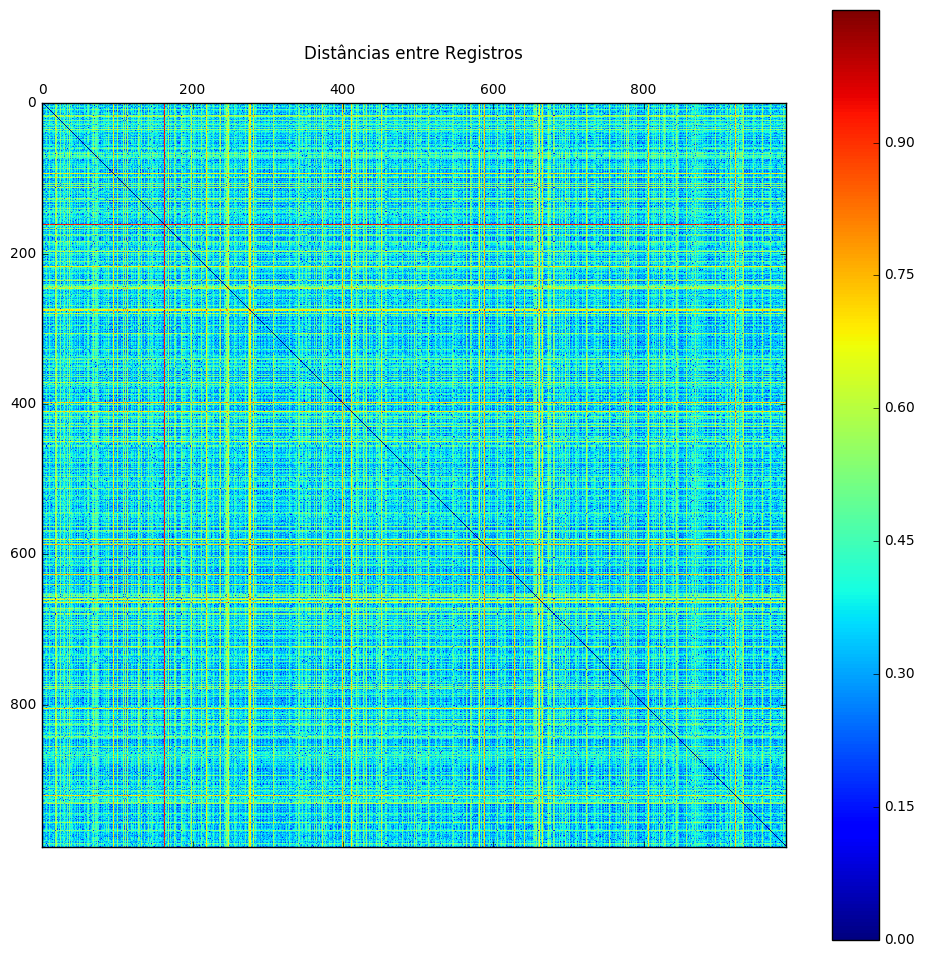

In [12]:
distances = pdist(train.values, metric='euclidean')
DistMatrix = squareform(distances)

mat = matshow(DistMatrix, cmap='jet')
title("Distâncias entre Registros")
colorbar(mat);

### Matriz de correlação:

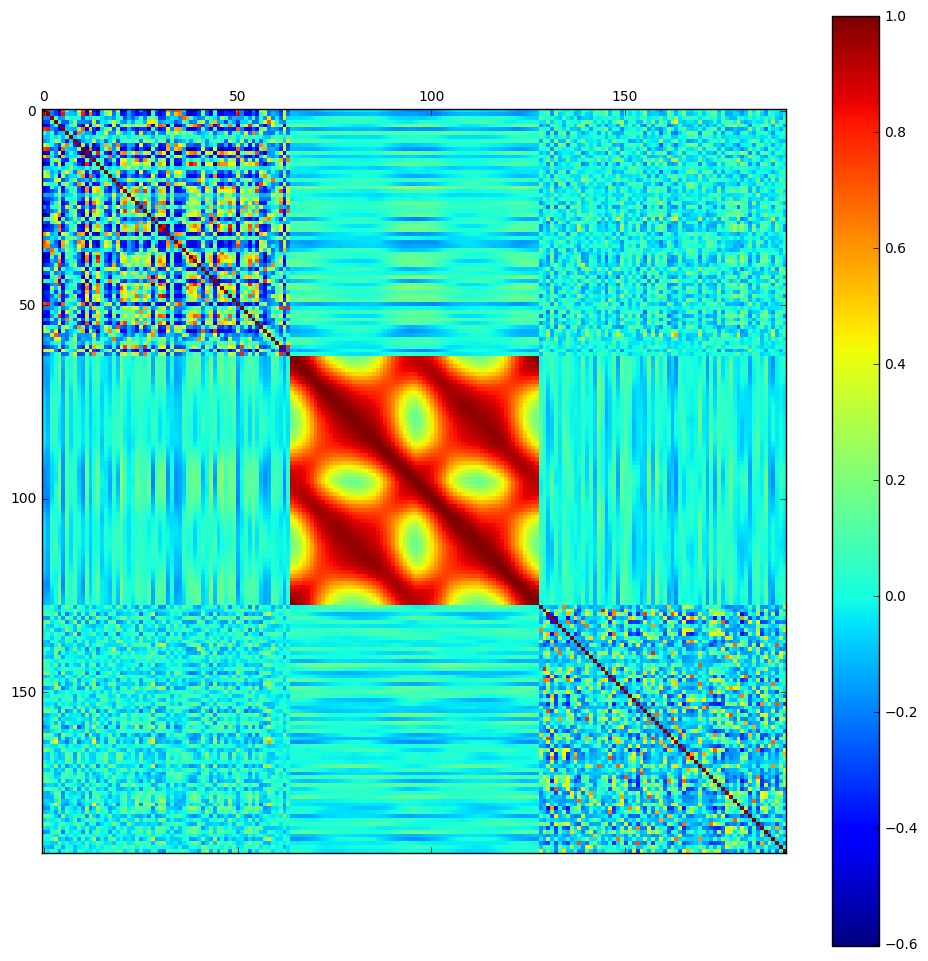

In [13]:
figure(figsize=(12,6))
mat = matshow(train.corr(), cmap='jet')
colorbar(mat);

### Padronização dos dados:

In [16]:
from scipy import stats

# Padronização por z-score
train_zscore = train

for c in train_zscore.columns.values: 
    train_zscore[c] = stats.zscore(train_zscore[c].values)
    
train = train_zscore

### Detecção de outliers

### Redução da dimensionalidade: